<h1><center><center><h1><h1><center><span style="color:#ba2ec7">Wind-Turbine-data</span><center><h1>

# My Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore

# My Scripts :

In [2]:
import Preprocessing
from EDA import ColorPalette, DataVisualizer, DataExplorer 

# My Figure Size :

In [3]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (8,6)  

# Remove Warning :

In [4]:
import warnings
warnings.simplefilter("ignore")

# Dataset :

In [5]:
wind_t = pd.read_csv('Dataset/T1.csv')
wind_t.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


# Exploring The Data :

### Data info :

In [6]:
wind_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


### Data shape :

In [7]:
print(Fore.LIGHTMAGENTA_EX + 'Number of Rows is : ', wind_t.shape[0])
print(Fore.LIGHTMAGENTA_EX + 'Number of columns is : ', wind_t.shape[1])

Number of Rows is :  50530
Number of columns is :  5


### Data duplicates :

In [8]:
print(Fore.LIGHTMAGENTA_EX,'There is "{}" complete duplicate'.format(wind_t.duplicated().sum()))

 There is "0" complete duplicate


### Number of NaN values :

In [9]:
wind_t.isna().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

### Summary statistics of the data :

In [10]:
wind_t.drop('Date/Time',axis=1).describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


### I can see that there is Active power negative... I will drop that

In [11]:
wind_t = wind_t.drop(wind_t[wind_t['LV ActivePower (kW)'] <= 0].index,axis=0)

In [12]:
data_explore = DataExplorer(data=wind_t)

data_explore.explore_unique_number()


Number of unique data in the "Date/Time" is :  39692

Number of unique data in the "LV ActivePower (kW)" is :  38706

Number of unique data in the "Wind Speed (m/s)" is :  39507

Number of unique data in the "Theoretical_Power_Curve (KWh)" is :  33757

Number of unique data in the "Wind Direction (°)" is :  39548


### making colour palette

In [13]:
cp = ColorPalette(hue=0.8,value_start=0.7,saturation=0.6)

In [14]:
palette = cp.create_sequential_palette(num_colors=20)
palette

[(0.6160000000000003, 0.27999999999999997, 0.7),
 (0.6292000000000003, 0.286, 0.715),
 (0.6424000000000003, 0.292, 0.73),
 (0.6556000000000003, 0.298, 0.745),
 (0.6688000000000004, 0.30400000000000005, 0.76),
 (0.6820000000000003, 0.31, 0.7749999999999999),
 (0.6952000000000003, 0.316, 0.7899999999999999),
 (0.7084000000000003, 0.322, 0.8049999999999999),
 (0.7216000000000004, 0.328, 0.82),
 (0.7348000000000003, 0.334, 0.835),
 (0.7480000000000003, 0.34, 0.85),
 (0.7612000000000004, 0.34600000000000003, 0.865),
 (0.7744000000000004, 0.35200000000000004, 0.88),
 (0.7876000000000004, 0.35800000000000004, 0.895),
 (0.8008000000000003, 0.364, 0.9099999999999999),
 (0.8140000000000005, 0.37000000000000005, 0.925),
 (0.8272000000000004, 0.376, 0.94),
 (0.8404000000000004, 0.382, 0.955),
 (0.8536000000000004, 0.388, 0.97),
 (0.8668000000000005, 0.394, 0.985)]

In [15]:
color = cp.get_color(palette=palette, color_index=12)

### Visualizing time series :

In [16]:
data_visualize = DataVisualizer(data=wind_t)

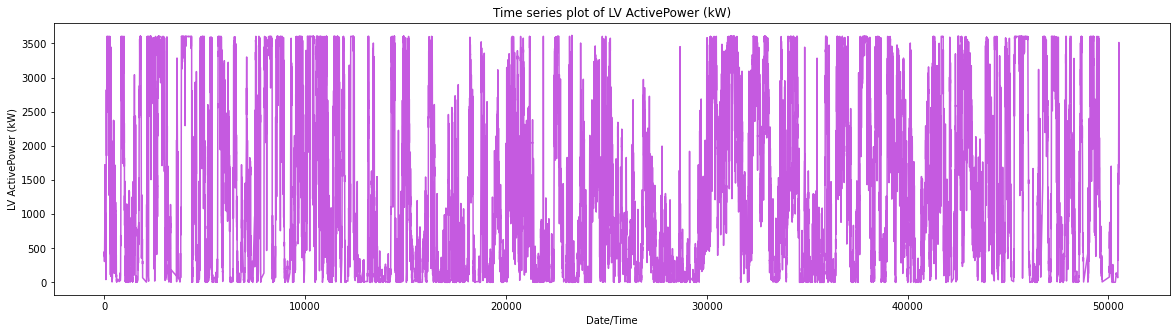

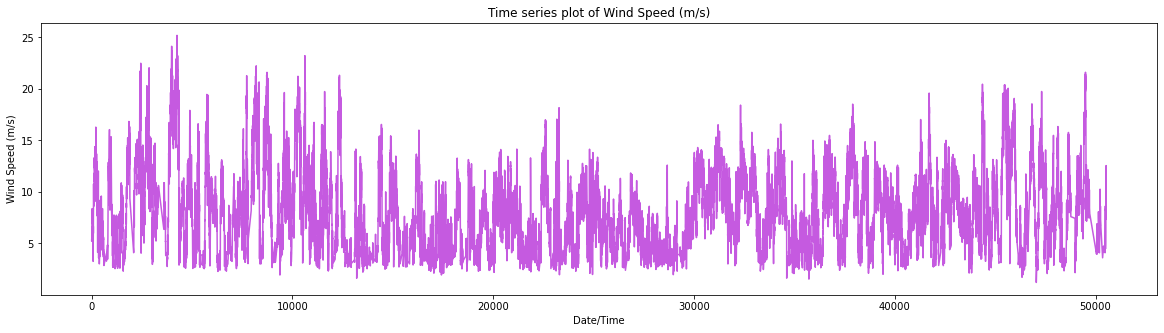

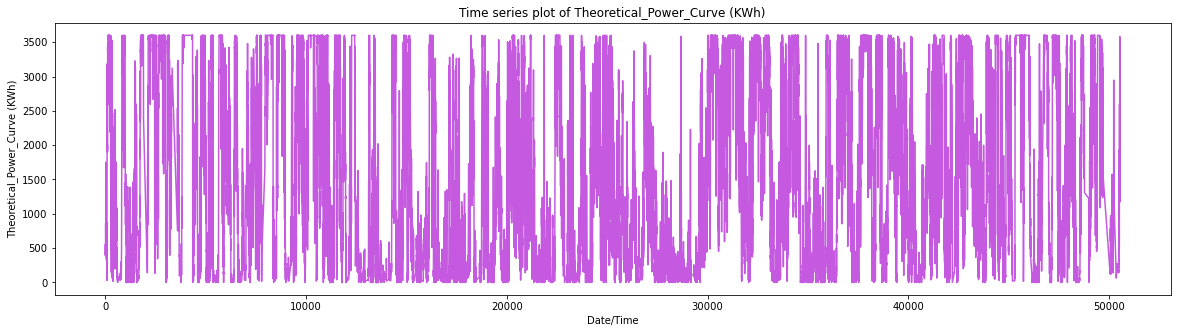

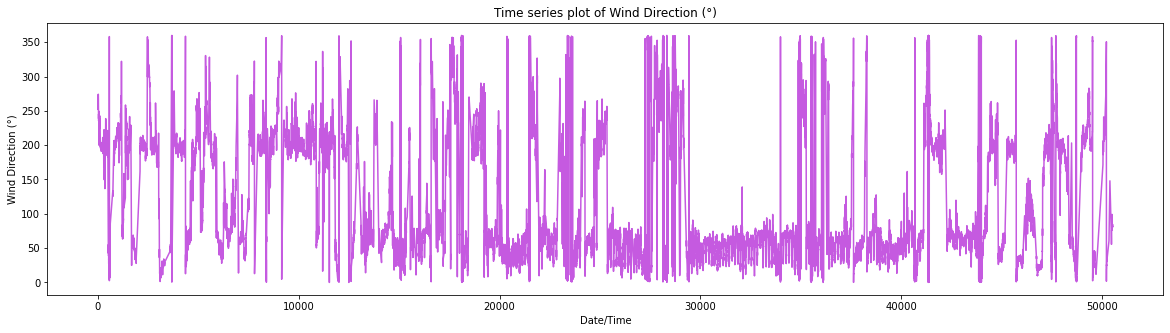

In [17]:
cols = wind_t.columns

data_visualize.plot_time_series(time_col='Date/Time',target_cols=cols,
                 width=20,height=5,format="%d %m %Y %H:%M",color=color)

### Now I want to predict `active power` based on other features so no need to do time series here (I will drop ) "Date/Time"

<br><br><br><br><br><br>

### and I will make train/test split now :

### Splitting The Data :

In [18]:
from sklearn.model_selection import train_test_split

x = wind_t.drop(['LV ActivePower (kW)'],axis=1)
y = wind_t[['LV ActivePower (kW)']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

### Showing Data :

In [19]:
X_train.head()

,Date/Time,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
37018,20 09 2018 16:30,9.699424,2590.594429,53.043739
13572,09 04 2018 18:10,7.401672,1207.579391,71.976089
27073,13 07 2018 05:40,7.548694,1283.123539,31.754570
40196,17 10 2018 08:40,7.916585,1482.596245,63.363419
29496,30 07 2018 01:30,3.788188,90.921239,52.837940


In [20]:
y_train.head()

,LV ActivePower (kW)
37018,2150.357910
13572,997.176025
27073,1266.180054
40196,1348.394043
29496,56.415901


## For EDA I will make a new dataframe which is `train_set` (X_train + y_train)

In [21]:
train_set = pd.concat([X_train,y_train],axis=1)
train_set.head()

,Date/Time,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),LV ActivePower (kW)
37018,20 09 2018 16:30,9.699424,2590.594429,53.043739,2150.357910
13572,09 04 2018 18:10,7.401672,1207.579391,71.976089,997.176025
27073,13 07 2018 05:40,7.548694,1283.123539,31.754570,1266.180054
40196,17 10 2018 08:40,7.916585,1482.596245,63.363419,1348.394043
29496,30 07 2018 01:30,3.788188,90.921239,52.837940,56.415901


### Ok `Date/Time` column won't make be usefull since I am not going to use timeseries

### So I will extract from it some features that I think may be usefull then i will drop it

In [22]:
dtt = Preprocessing.DateTimeTransformer(column='Date/Time',date_format='%d %m %Y %H:%M',drop_original=True)
train_set = dtt.fit_transform(train_set) 
train_set.head()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),LV ActivePower (kW),day,month,year
37018,9.699424,2590.594429,53.043739,2150.357910,20,9,2018
13572,7.401672,1207.579391,71.976089,997.176025,9,4,2018
27073,7.548694,1283.123539,31.754570,1266.180054,13,7,2018
40196,7.916585,1482.596245,63.363419,1348.394043,17,10,2018
29496,3.788188,90.921239,52.837940,56.415901,30,7,2018


### Let's have summary about new columns :

In [23]:
data_explore = DataExplorer(data=train_set)
data_explore.explore_unique_number(cols=['day','month','year'])


Number of unique data in the "day" is :  31

Number of unique data in the "month" is :  12

Number of unique data in the "year" is :  1


### Ok so I can notice that all data is in `2018`, so no need for that column

In [24]:
drop_cols = Preprocessing.DropColumnsTransformer(columns=['year'])
train_set = drop_cols.fit_transform(train_set)
train_set.head()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),LV ActivePower (kW),day,month
37018,9.699424,2590.594429,53.043739,2150.357910,20,9
13572,7.401672,1207.579391,71.976089,997.176025,9,4
27073,7.548694,1283.123539,31.754570,1266.180054,13,7
40196,7.916585,1482.596245,63.363419,1348.394043,17,10
29496,3.788188,90.921239,52.837940,56.415901,30,7


### I will do some cleaning while working on the train_set then I will remember all of what I will do then,<br><br> I will put all of them on a pipline and I will apply this pipline on `X_train` and `X_test` data

## Now I will work on understanding the train_set without looking at test (to avoid overfitting by knowing the test relations) <br><br>

<br><br><br><br><br><br>

# Let's explore more using data visualizations :<br><br><br><br>

In [25]:
data_visualize = DataVisualizer(data=train_set)

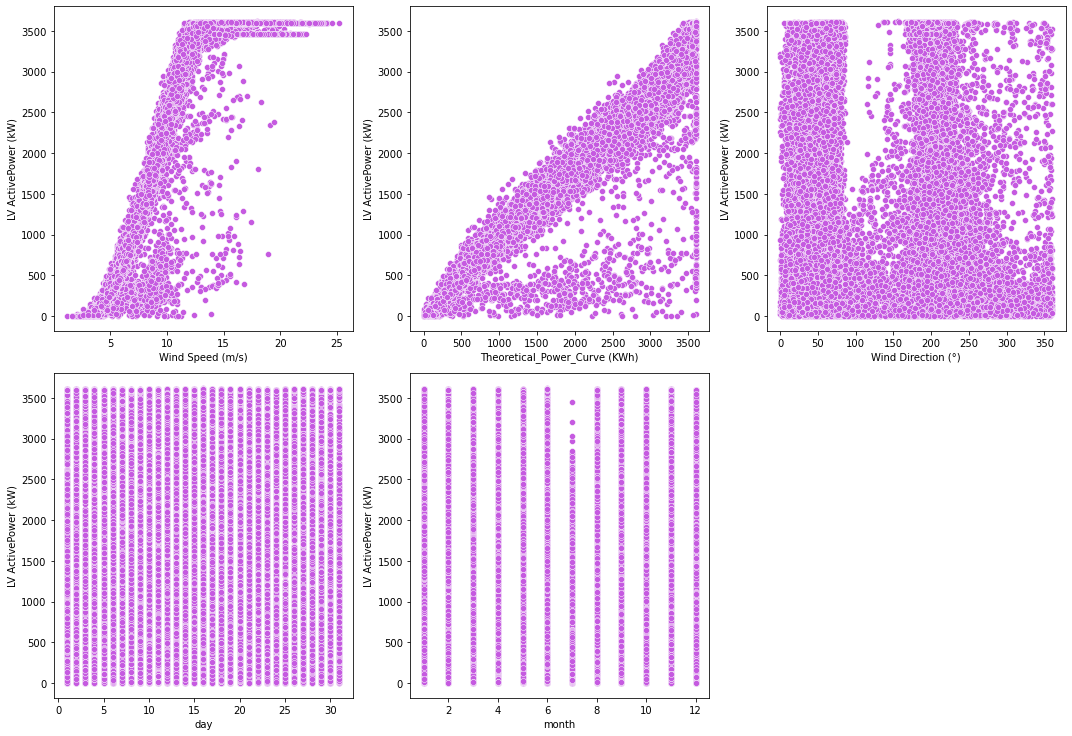

In [26]:
cols = list(train_set.drop('LV ActivePower (kW)',axis=1).columns)

data_visualize.plot_feature_by_target(target='LV ActivePower (kW)',cols=cols,plotdim=(3,3), color=color)

### Something seems strange !!! too many zeros 
### Let's find out why

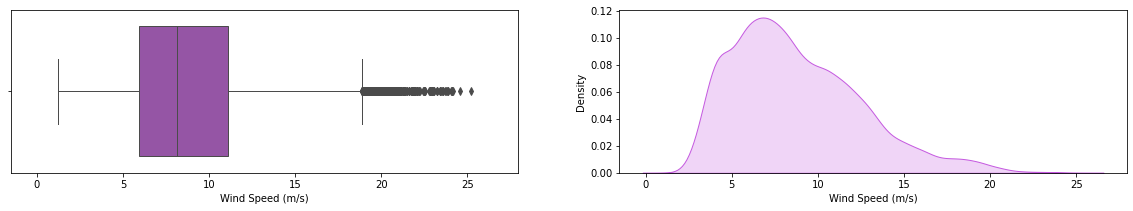

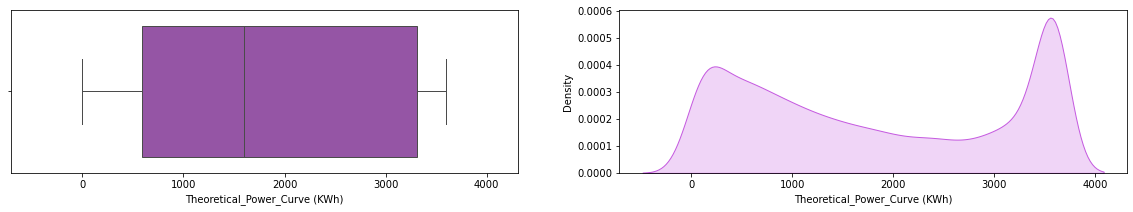

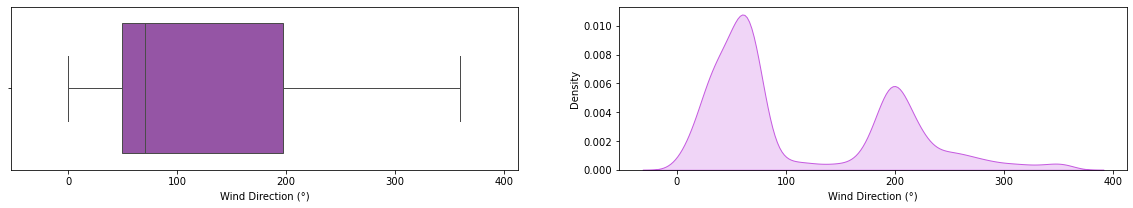

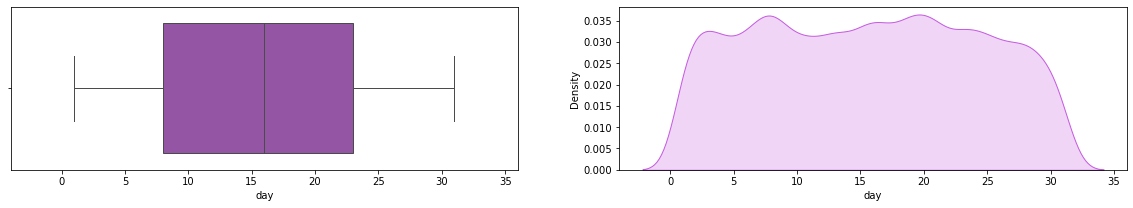

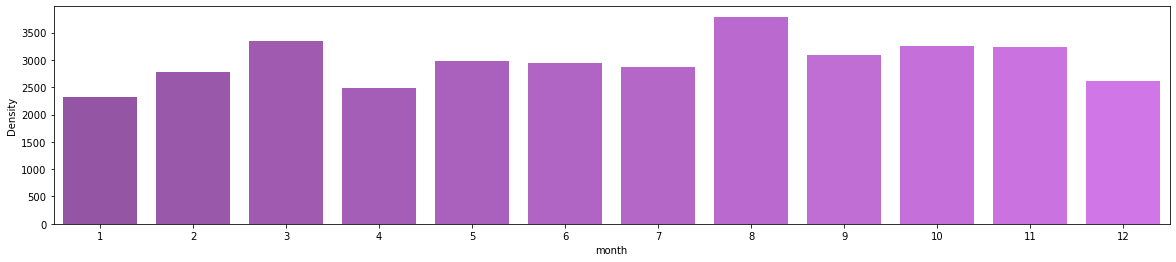

In [27]:
data_visualize.plot_distribution(cols=cols,palette=cp,color=color)

### Looks like this is an incorrect data that I will remove 

### This class I made will remove any rows in `	Wind Speed (m/s)` column with value $≤$ 0 

In [28]:
drop_rows = Preprocessing.DropRowsTransformer(column='Wind Speed (m/s)',value=0)

train_set = drop_rows.fit_transform(train_set)
print('Number of 0 values in "Wind Speed (m/s)" column now is : ',(train_set['Wind Speed (m/s)'] == 0).sum())

Number of 0 values in "Wind Speed (m/s)" column now is :  0


## Let's see feature correlations :

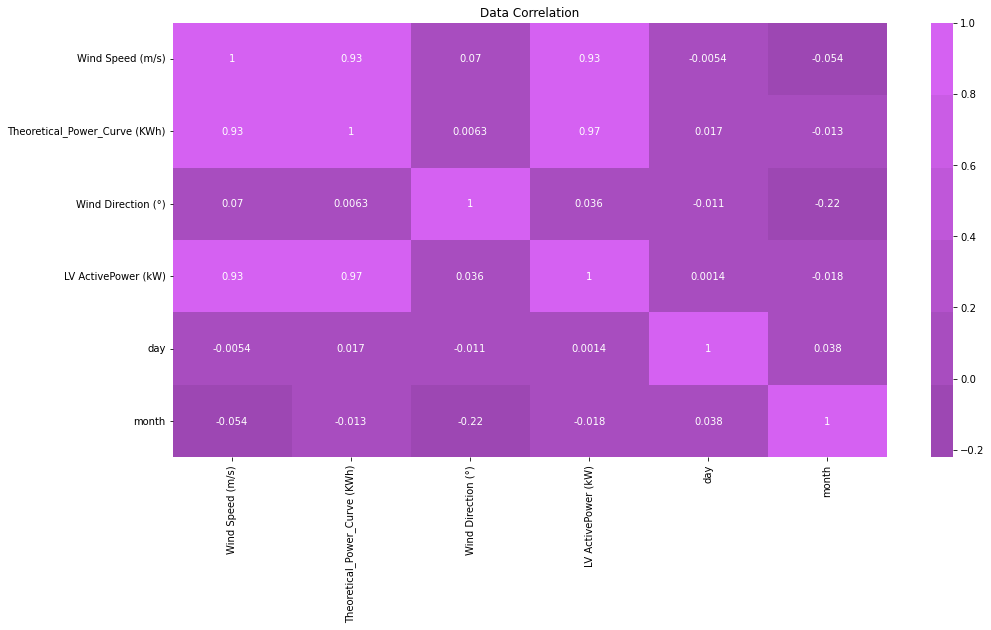

In [29]:
data_visualize.plot_correlation(figsize=(16,8),palette=cp,cbar=True)

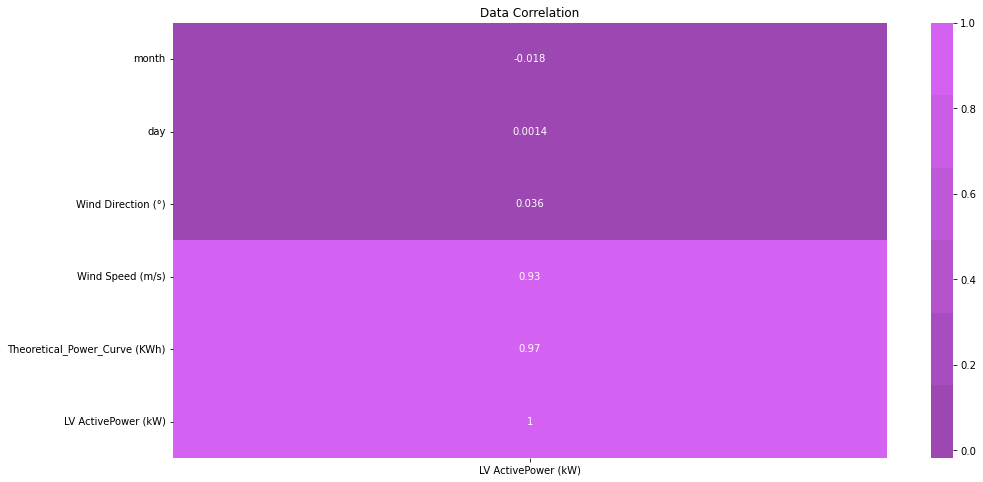

In [30]:
data_visualize.plot_correlation(target='LV ActivePower (kW)',
                                figsize=(16,8),palette=cp,cbar=True,ascending=True)

### As expected very low linear correlation between `Wind Direction` and `Power`

### Checking distribution after removing zeros from data :

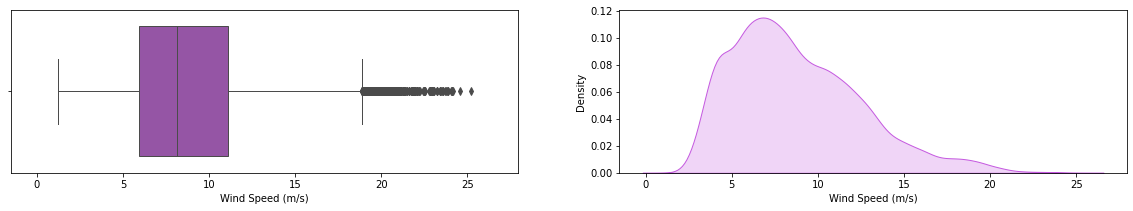

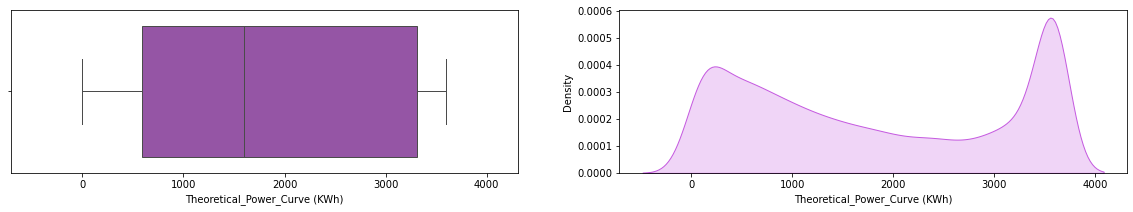

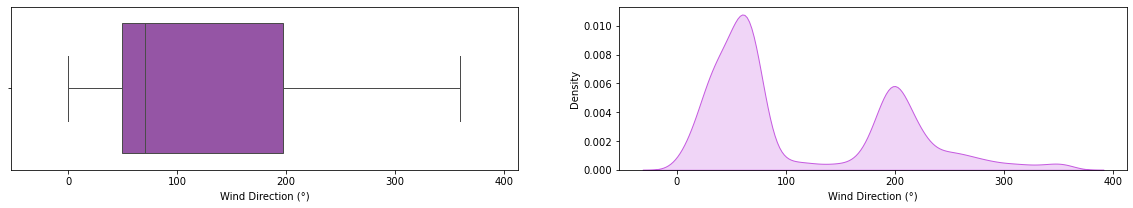

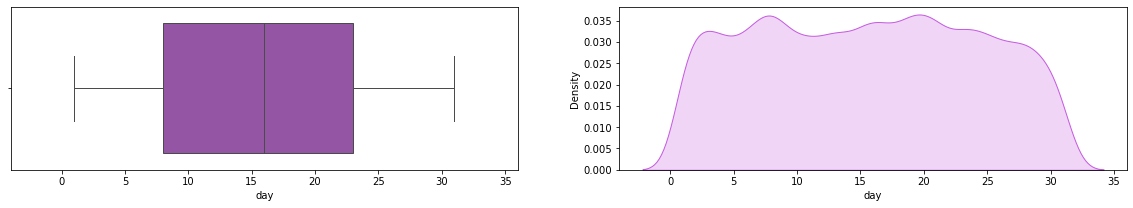

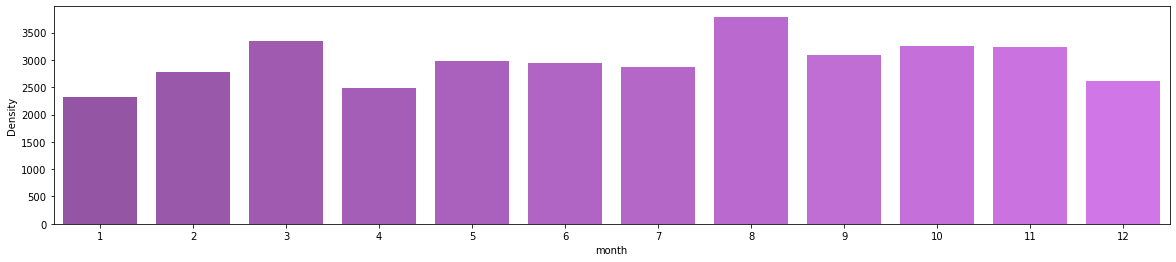

In [31]:
data_visualize.plot_distribution(cols=cols,palette=cp,color=color)

### I want to know how does Theoretical power is effected by `Wind Direction` and `Wind Speed`:

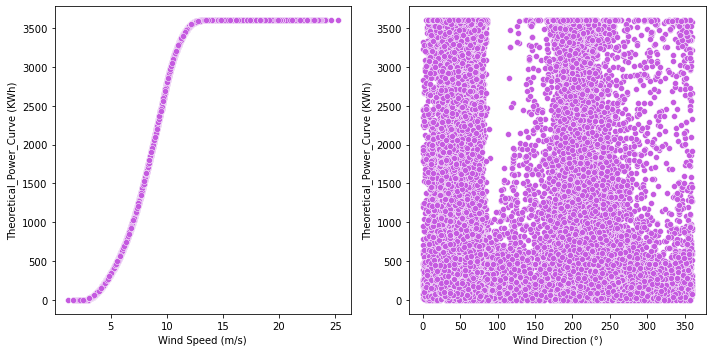

In [32]:
data_visualize.plot_feature_by_target(target='Theoretical_Power_Curve (KWh)',color=color,
                                      cols=['Wind Speed (m/s)','Wind Direction (°)'],plotdim=(1,2))

<br><br><br><br><br><br>

## For now no more data analysis insights I want to come up with it for now so I will go for building a dummy model 

### Data skewness :

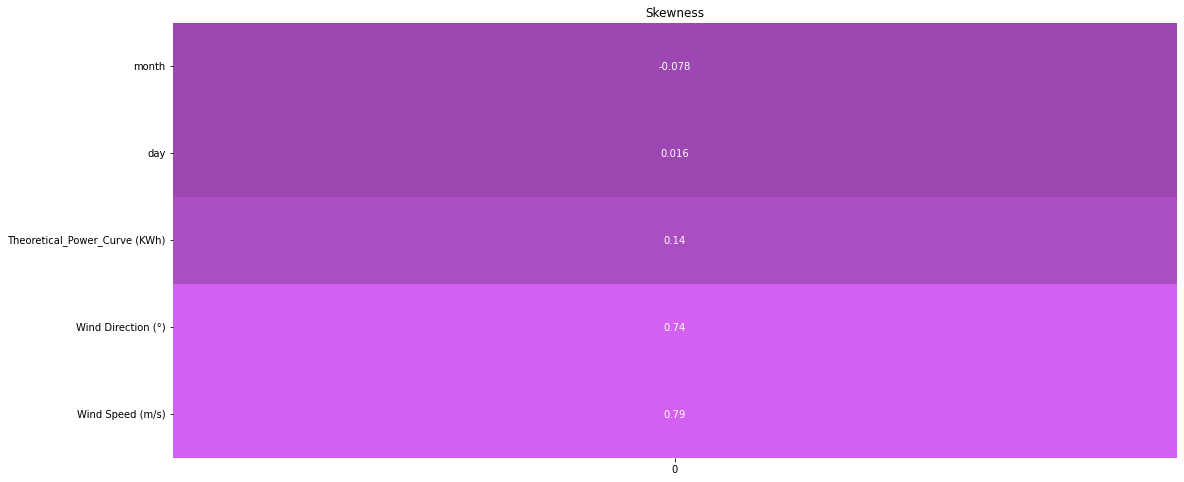

In [33]:
cols = ['Wind Direction (°)','Theoretical_Power_Curve (KWh)','Wind Speed (m/s)','day','month']
data_visualize.plot_skewness(cols=cols,palette=cp)

### Skewness don't seem bad, i think winsorization with `Wind Speed` column may be good solution


## let's see

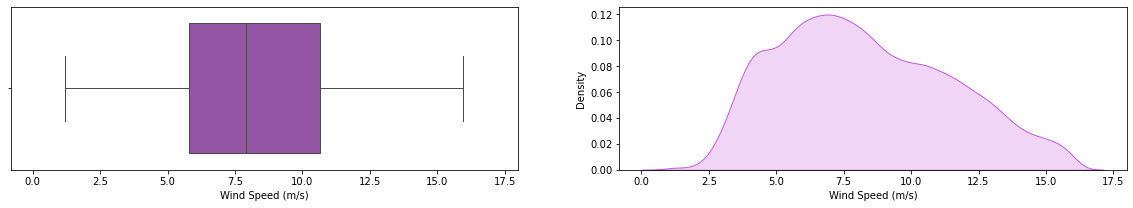

In [34]:
wr = Preprocessing.WinsorizationImpute(columns=['Wind Speed (m/s)'],outlier_handling='random_in_distribution',
                                       p=0,q=0.95)
winsorized = wr.fit_transform(train_set)


DataVisualizer(data=winsorized).plot_distribution(cols=['Wind Speed (m/s)'],palette=cp,color=color)

### I will build a pipeline containing winsorization and other without and see which better model results

### making dummy model :

In [35]:
x_dummy = train_set.drop('LV ActivePower (kW)',axis=1)
y_dummy = train_set['LV ActivePower (kW)']

sc = Preprocessing.StandardScaleTransform(columns=x_dummy.columns)
x_dummy = sc.fit_transform(x_dummy)

In [36]:
x_test_dummy = X_test.copy()
y_test_dummy = y_test.copy()

x_test_dummy = dtt.transform(x_test_dummy)
x_test_dummy = wr.transform(x_test_dummy)
x_test_dummy = drop_cols.transform(x_test_dummy)
x_test_dummy = sc.transform(x_test_dummy)

In [37]:
from sklearn.ensemble import (AdaBoostRegressor, GradientBoostingRegressor,
                              RandomForestRegressor, VotingRegressor, BaggingRegressor)
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import time


models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'ElasticNet Regression': ElasticNet(),
    'Support Vector Regression': SVR(),
    'KNN': KNeighborsRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Bagging Regression': BaggingRegressor(),
    'LGBM': LGBMRegressor()
}


metrics = []

for name, model in models.items():
    start_time = time.time()
    model.fit(x_dummy, y_dummy)
    train_time = time.time() - start_time
    start_time = time.time()
    y_pred_dummy = model.predict(x_test_dummy)
    pred_time = time.time() - start_time
    mse = mean_squared_error(y_test_dummy, y_pred_dummy)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_dummy, y_pred_dummy)
    r2 = r2_score(y_test_dummy, y_pred_dummy)
    metrics.append((name, train_time, pred_time, rmse, mse, mae, r2))

metrics_df = pd.DataFrame(metrics, columns=['Model', 'Training Time', 'Prediction Time', 'RMSE', 'MSE', 'MAE', 'R-Squared'])
metrics_df

,Model,Training Time,Prediction Time,RMSE,MSE,MAE,R-Squared
0,Linear Regression,0.007977,0.000997,301.756170,91056.786407,158.746326,0.942627
1,Lasso Regression,0.004986,0.000997,302.002056,91205.241993,158.569917,0.942533
2,Ridge Regression,0.001995,0.000998,301.780962,91071.749079,158.758653,0.942617
3,ElasticNet Regression,0.003989,0.000998,486.237201,236426.615218,360.634046,0.851032
4,Support Vector Regression,61.178123,10.903419,412.366093,170045.794520,236.722801,0.892857
5,KNN,0.044880,0.025949,265.009052,70229.797395,105.976220,0.955750
6,Random Forest Regression,19.007712,0.113696,355.408727,126315.363503,134.136822,0.920411
7,AdaBoost Regression,0.460819,0.003989,431.897652,186535.581825,270.610311,0.882468
8,Bagging Regression,1.952778,0.011968,407.244738,165848.276648,150.028864,0.895502
9,LGBM,0.107684,0.002991,260.909325,68073.675805,108.176445,0.957108


In [38]:
X_train.to_csv('Dataset/xtrain_data.csv')
y_train.to_csv('Dataset/ytrain_data.csv')
X_test.to_csv('Dataset/xtest_data.csv')
y_test.to_csv('Dataset/ytest_data.csv')

<br><br><br><br>
# Let's continoue making the model on another notebooks...